In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("exoplanet_data.csv")
df1.head()


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


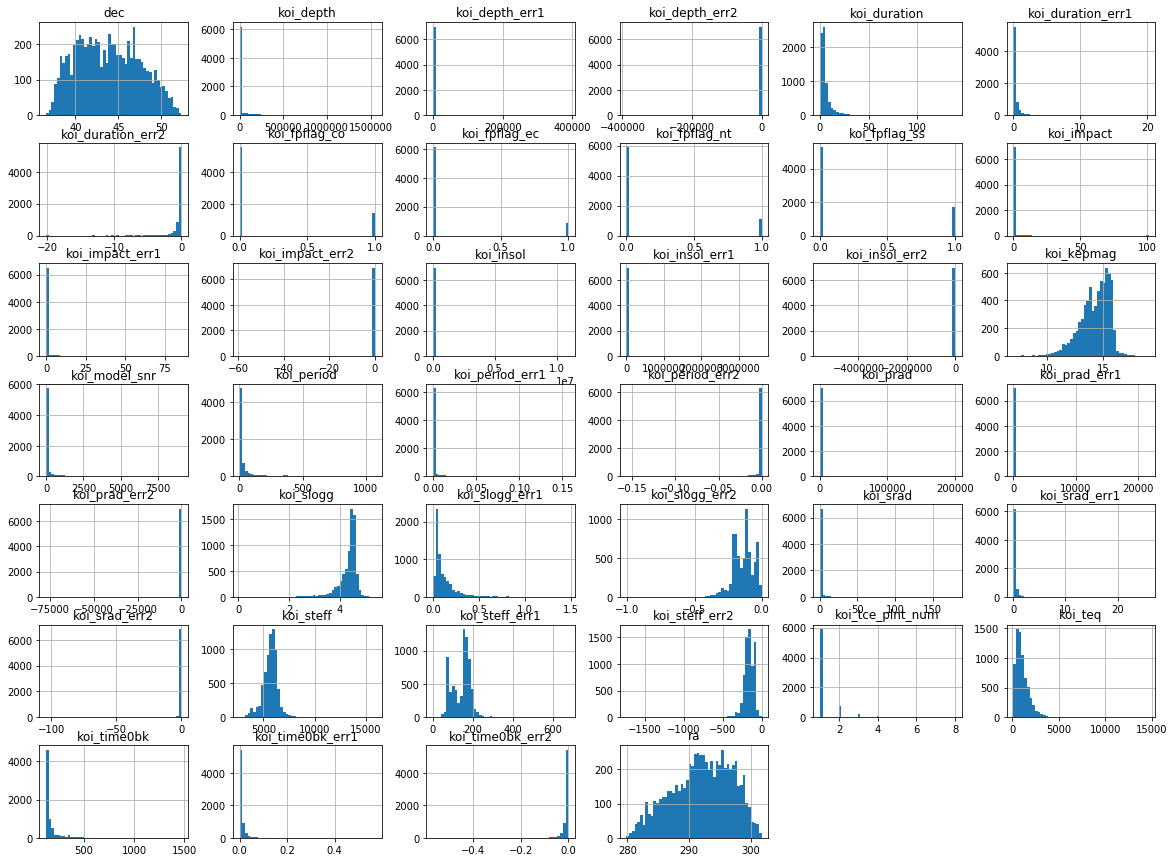

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt 
df1.hist(bins=50, figsize=(20,15)) 
plt.show()

In [4]:
y = df1["koi_disposition"].values.reshape(-1, 1)
X = df1.drop('koi_disposition', axis=1)
print(X.shape, y.shape)

(6991, 40) (6991, 1)


In [5]:
X.columns
np.unique(y)

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 11)
print(X_train.shape, y_train.shape)

(5592, 40) (5592, 1)


In [41]:
from sklearn import tree

tree = DecisionTreeClassifier(criterion='entropy',
    max_depth=6, random_state=1)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [60]:
from sklearn import tree

for i in range(10):
    tree = DecisionTreeClassifier(criterion='entropy',
        max_depth= (10+i), random_state=52)
    tree.fit(X, y)

    predictions = tree.predict(X_test)
    predictions
    successes = 0
    failures = 0
    for j in range(len(predictions)):
        if predictions[j] == y_test[j]:
            successes +=1
        else:
            failures +=1

    print(f"depth:{16+i}, Success rate: {successes/(successes+failures)}")


depth:16, Success rate: 0.9235167977126519
depth:17, Success rate: 0.9263759828448892
depth:18, Success rate: 0.9399571122230165
depth:19, Success rate: 0.9449606862044317
depth:20, Success rate: 0.9471050750536097
depth:21, Success rate: 0.9535382416011436
depth:22, Success rate: 0.9628305932809149
depth:23, Success rate: 0.9771265189421015
depth:24, Success rate: 0.9785561115082202
depth:25, Success rate: 0.9835596854896355


In [56]:
!pip3 install pydotplus
!pip install graphviz

You should consider upgrading via the 'pip install --upgrade pip' command.


In [57]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz


dot_data = export_graphviz(                           # Create dot data
    tree, filled=True, rounded=True,
    class_names=np.unique(y),
    feature_names=X.columns,
    out_file=None
)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('tree.png')                 

True

SyntaxError: invalid syntax (<ipython-input-59-5fd80db69702>, line 8)